In [1]:
import cv2 as cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import sys
import re
from tqdm import tqdm
import layoutparser as lp

Processing files:   0%|          | 0/9 [00:00<?, ?it/s]

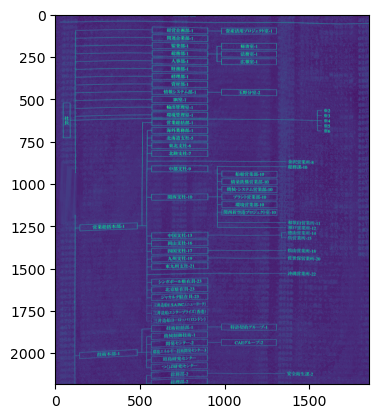

Processing files:  11%|█         | 1/9 [00:00<00:01,  4.24it/s]

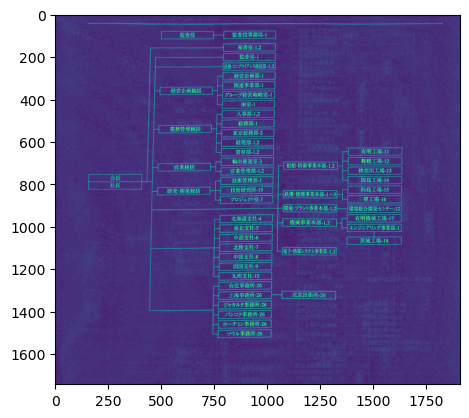

Processing files:  22%|██▏       | 2/9 [00:00<00:01,  4.26it/s]

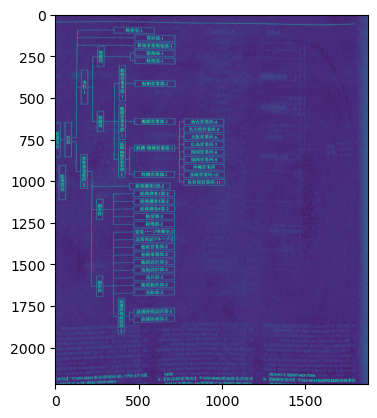

Processing files:  33%|███▎      | 3/9 [00:00<00:01,  4.18it/s]

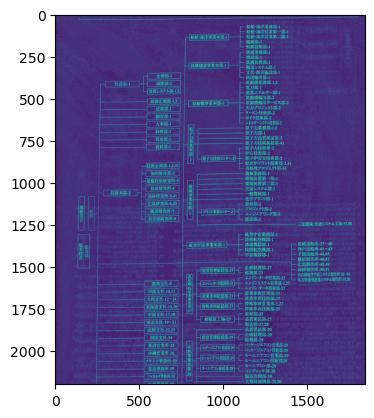

Processing files:  44%|████▍     | 4/9 [00:00<00:01,  4.17it/s]

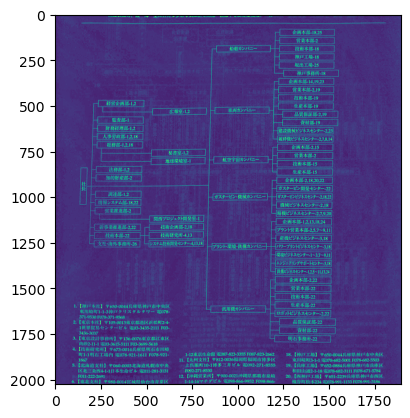

Processing files:  56%|█████▌    | 5/9 [00:01<00:00,  4.14it/s]

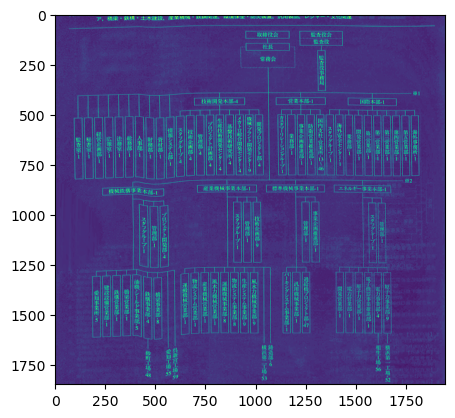

Processing files:  67%|██████▋   | 6/9 [00:01<00:00,  4.13it/s]

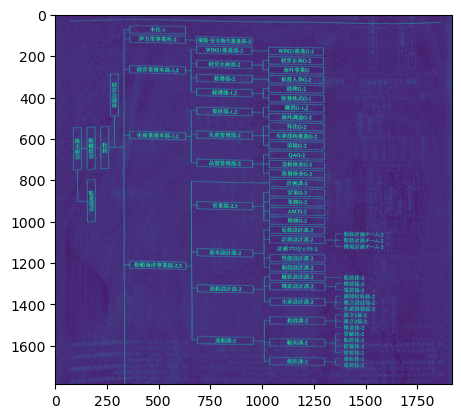

Processing files:  78%|███████▊  | 7/9 [00:01<00:00,  3.99it/s]

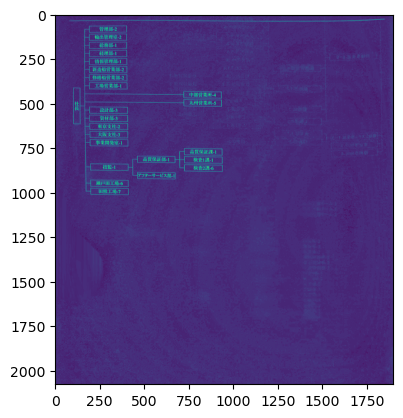

Processing files:  89%|████████▉ | 8/9 [00:02<00:00,  3.65it/s]

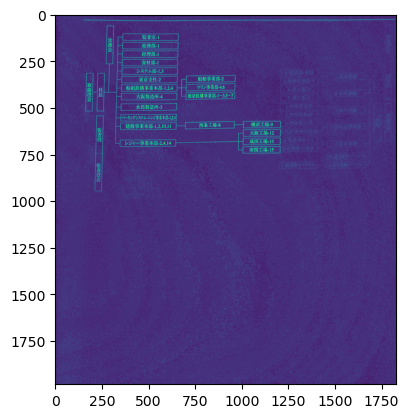

Processing files: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]


In [11]:
path = "/Users/satoshan/Library/CloudStorage/GoogleDrive-sato41kawa0707@gmail.com/マイドライブ/scan_org_charts/data/cropped/"
files = os.listdir(path)
files = [f for f in files if os.path.isfile(os.path.join(path, f))]
files.sort()
for j in tqdm(range(1,10), desc="Processing files"):
    # load image
    file = os.path.join(path, files[j])
    img = cv2.imread(file)
    # cutting footer
    # make figure biniary
    gray_image = cv2.cvtColor(img[:-200,:], cv2.COLOR_BGR2GRAY)
    gray_image_inv = cv2.bitwise_not(gray_image)

    # footer detection
    row_sums = np.sum(gray_image_inv, axis=1) 
    threshold = 7000
    empty_row_threshold = 20

    empty_row_count = 0
    footer_start = None
    for i, row_sum in enumerate(row_sums):
        if row_sum < threshold:
            empty_row_count += 1
        else:
            empty_row_count = 0
        if empty_row_count >= empty_row_threshold:
            footer_start = i - empty_row_threshold + 1
            break

    if footer_start is not None:
        final_image = gray_image_inv[:footer_start, :]
    else:
        final_image = gray_image_inv

    plt.imshow(final_image)
    plt.show()
